# <h1>Extracting Stock Data Using Web Scraping</h1>

In [2]:
%pip install pandas requests bs4 html5lib lxml plotly -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from bs4 import XMLParsedAsHTMLWarning

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, we can filter or ignore warning messages or categories

In [6]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Using Webscraping to Extract Stock Data Example

We will extract Netflix stock data [https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html).


# Steps for extracting the data
1. Send an HTTP request to the web page using the requests library.
2. Parse the HTML content of the web page using BeautifulSoup.
3. Identify the HTML tags that contain the data you want to extract.
4. Use BeautifulSoup methods to extract the data from the HTML tags.
5. Print the extracted data


### __Step 1:__ Send an HTTP request to the web page

We will use the request library for sending an HTTP request to the web page.<br>

In [37]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

The requests.get() method takes a URL as its first argument, which specifies the location of the resource to be retrieved. In this case, the value of the url variable is passed as the argument to the requests.get() method, because you will store a web page URL in a url variable.

You use the .text method for extracting the HTML content as a string in order to make it readable.


In [38]:
data  = requests.get(url).text
print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><met

### __Step 2:__ Parse the HTML content of the web page using BeautifulSoup.

<hr>
<hr>
<center>

#### __What is parsing?__
In simple words, parsing refers to the process of analyzing a string of text or a data structure, usually following a set of rules or grammar, to understand its structure and meaning.
Parsing involves breaking down a piece of text or data into its individual components or elements, and then analyzing those components to extract the desired information or to understand their relationships and meanings.</center>
<hr>
<hr>


#### Parsing the data using the BeautifulSoup library
* Create a new BeautifulSoup object.
<br>
<br>
<b>Note: </b>To create a BeautifulSoup object in Python, you need to pass two arguments to its constructor:

1. The HTML or XML content that you want to parse as a string.
2. The name of the parser that you want to use to parse the HTML or XML content. This argument is optional, and if you don't specify a parser, BeautifulSoup will use the default HTML parser included with the library.
here in this lab we are using "html5lib" parser.


In [39]:
soup = BeautifulSoup(data, 'html.parser')

### __Step 3:__ Identify the HTML tags


As stated above, the web page consists of a table so, we will scrape the content of the HTML web page and convert the table into a data frame.

We will create an empty data frame using the <b> pd.DataFrame() </b> function with the following columns:
* "Date"
* "Open"
* "High" 
* "Low" 
* "Close"
* "Volume"


In [40]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

<hr>
<hr>
<center>

#### __Working on HTML table__  </center>
<br>

These are the following tags which are used while creating HTML tables.

* &lt;table&gt;: This tag is a root tag used to define the start and end of the table. All the content of the table is enclosed within these tags. 


* &lt;tr&gt;: This tag is used to define a table row. Each row of the table is defined within this tag.

* &lt;td&gt;: This tag is used to define a table cell. Each cell of the table is defined within this tag. You can specify the content of the cell between the opening and closing <td> tags.

* &lt;th&gt;: This tag is used to define a header cell in the table. The header cell is used to describe the contents of a column or row. By default, the text inside a <th> tag is bold and centered.

* &lt;tbody&gt;: This is the main content of the table, which is defined using the <tbody> tag. It contains one or more rows of <tr> elements.

<hr>
<hr>



### __Step 4:__ Use a BeautifulSoup method for extracting data


We will use <b>find()</b> and <b>find_all()</b> methods of the BeautifulSoup object to locate the table body and table row respectively in the HTML. 
   * The <i>find() method </i> will return particular tag content.
   * The <i>find_all()</i> method returns a list of all matching tags in the HTML.

In [41]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = pd.concat([netflix_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)    

### __Step 5:__ Print the extracted data

We can now print out the data frame using the head() or tail() function.

In [42]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


# Extracting data using `pandas` library

We can also use the pandas `read_html` function from the pandas library and use the URL for extracting data.

<center>

#### What is __read_html__ in pandas library?
`pd.read_html(url)` is a function provided by the pandas library in Python that is used to extract tables from HTML web pages. It takes in a URL as input and returns a list of all the tables found on the web page. 
</center>


In [43]:
read_html_pandas_data = pd.read_html(url)

Or you can convert the BeautifulSoup object to a string.

In [44]:
read_html_pandas_data = pd.read_html(str(soup))

/var/folders/j1/9fxjp53j61vcxxw21brhmtyr0000gn/T/ipykernel_37638/1034403826.py:1: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



Because there is only one table on the page, just take the first table in the returned list.

In [45]:
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


# __MINE__

In [46]:
#%pip install pandas requests bs4 html5lib lxml plotly -q

In [47]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [48]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [49]:
my_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"

In [50]:
my_data = requests.get(my_url)
html_data = print(my_data) # <Response [200]>  

<Response [200]>


In [51]:
my_soup = BeautifulSoup(my_data.text, 'html.parser')

In [52]:
# What is the content of the title attribute?

title = my_soup.find('title')
if title:
    print(title.text)
else:
    print("No title found")

Amazon.com, Inc. (AMZN) Stock Historical Prices & Data - Yahoo Finance


In [53]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in my_soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    amazon_data = pd.concat([amazon_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)

amazon_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,528,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,556,200","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,226,100","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,899,300","3,148.73"
...,...,...,...,...,...,...,...
56,"May 01, 2016",663.92,724.23,656.00,722.79,"90,614,500",722.79
57,"Apr 01, 2016",590.49,669.98,585.25,659.59,"78,464,200",659.59
58,"Mar 01, 2016",556.29,603.24,538.58,593.64,"94,009,500",593.64
59,"Feb 01, 2016",578.15,581.80,474.00,552.52,"124,144,800",552.52


In [54]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,528,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,556,200","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,226,100","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,899,300","3,148.73"


In [55]:
# Columns
print(amazon_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [56]:
last_open = amazon_data['Open'].iloc[-1] # iloc = integer-location based indexer, selecting rows and columns by their zero-based integer position, rather than by label.
print("Open of the last row:", last_open)

Open of the last row: 656.29


# __MINE_2__

## __Question 1__: Use yfinance to Extract Stock Data

In [ ]:
#%pip install yfinance -q
import yfinance as yf

# Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.
TSLA = yf.Ticker("TSLA")

##------##

# Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.
tesla_data = TSLA.history(period="max")

##------##

# **Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. 
# Take a screenshot of the results and code from the beginning of Question 1 to the results below.
tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## __Question 2__: Use Webscraping to Extract Tesla Revenue Data

In [7]:
import requests
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

##------##

TSLA_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
TSLA_data = requests.get(TSLA_url)
html_data = print(TSLA_data)

##------##

warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)
TSLA_soup = BeautifulSoup(TSLA_data.text, 'html.parser')
TSLA_soup.find_all("tbody") # to isolate the table, to loop through the rows and columns

##------## Initialize empty DataFrame

tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

##------## Removing the comma and dollar sign from the `Revenue` column.

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$', "", regex=True)

##------## Removing null or empty strings in the Revenue column.

tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

##------##

print(tesla_revenue.tail())

<Response [200]>
Empty DataFrame
Columns: [Date, Revenue]
Index: []


## __Question 3__: Use yfinance to Extract Stock Data

In [8]:
# Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.

import yfinance as yf
GME = yf.Ticker("GME")

# Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.
gme_data = GME.history(period="max")

# **Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the 
# gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.
gme_data.reset_index(inplace=True)

gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## __Question 4__: Use Webscraping to Extract GME Revenue Data

In [9]:
# Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html.
# Save the text of the response as a variable named `html_data_2`.
import requests
from bs4 import BeautifulSoup
from bs4 import XMLParsedAsHTMLWarning

GME_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gme_data = requests.get(GME_url)
html_data_2 = print(gme_data)

# Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.
GME_soup = BeautifulSoup(gme_data.text, 'html.parser')

# Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. 
# The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.
GME_soup.find_all("tbody")
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r',|\$', "", regex=True)

# Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.
print(gme_revenue.tail())

<Response [200]>
Empty DataFrame
Columns: [Date, Revenue]
Index: []


All of the code in one place

In [72]:
## ---- ##
GME = yf.Ticker("GME")
gme_data = GME.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

## ---- ##
import requests
GME_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gme_data = requests.get(GME_url)
html_data_2 = print(gme_data)

## ---- ##
warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)
GME_soup = BeautifulSoup(gme_data.text, 'html.parser')
print(GME_soup.find_all("tbody"))

## ---- ##
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r',|\$', "", regex=True)

## ---- ##
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

## ---- ##
print(gme_revenue.tail())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<Response [200]>
[<tbody>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$6,466</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$8,285</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$8,547</td>
</tr>
<tr>
<td style="text-align:center"

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

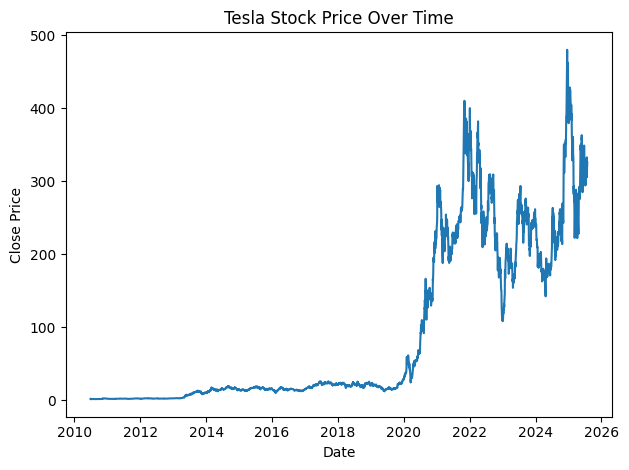

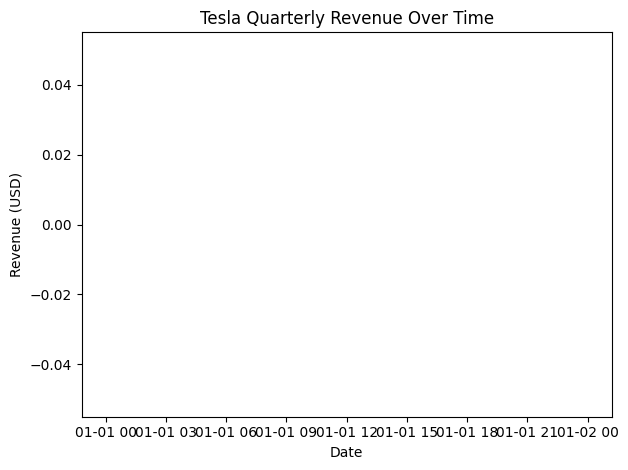

In [10]:
import matplotlib.pyplot as plt

def make_graph(price_df, revenue_df, ticker):
    # ensure dates are datetimes
    price_df['Date']   = pd.to_datetime(price_df['Date'])
    revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])

    # first chart: stock price
    fig1, ax1 = plt.subplots()
    ax1.plot(price_df['Date'], price_df['Close'])
    ax1.set_title(f'{ticker} Stock Price Over Time')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price')
    fig1.tight_layout()

    # second chart: quarterly revenue
    fig2, ax2 = plt.subplots()
    ax2.plot(revenue_df['Date'], revenue_df['Revenue'])
    ax2.set_title(f'{ticker} Quarterly Revenue Over Time')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Revenue (USD)')
    fig2.tight_layout()

    return fig1, fig2

# attach to pandas
pd.make_graph = make_graph

# now your call works:
# graph = pd.make_graph(gme_data, gme_revenue, 'GME')
make_graph(tesla_data, tesla_revenue, 'Tesla')

In [64]:
# import matplotlib.pyplot as plt

# def make_graph(price_df, revenue_df, ticker):
#     # ensure dates are datetimes
#     price_df['Date']   = pd.to_datetime(price_df['Date'])
#     revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])

#     # first chart: stock price
#     fig1, ax1 = plt.subplots()
#     ax1.plot(price_df['Date'], price_df['Close'])
#     ax1.set_title(f'{ticker} Stock Price Over Time')
#     ax1.set_xlabel('Date')
#     ax1.set_ylabel('Close Price')
#     fig1.tight_layout()

#     # second chart: quarterly revenue
#     fig2, ax2 = plt.subplots()
#     ax2.plot(revenue_df['Date'], revenue_df['Revenue'])
#     ax2.set_title(f'{ticker} Quarterly Revenue Over Time')
#     ax2.set_xlabel('Date')
#     ax2.set_ylabel('Revenue (USD)')
#     fig2.tight_layout()

#     return fig1, fig2

# # attach to pandas
# pd.make_graph = make_graph

# # now your call works:
# # graph = pd.make_graph(gme_data, gme_revenue, 'GME')
# make_graph(gme_data, gme_revenue, 'GameStop')

In [87]:
import matplotlib.pyplot as plt

def make_graph(price_df, revenue_df, ticker):
    # ensure dates are datetimes
    price_df['Date']   = pd.to_datetime(price_df['Date'])
    revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])

    # first chart: stock price
    fig1, ax1 = plt.subplots()
    ax1.plot(price_df['Date'], price_df['Close'])
    ax1.set_title(f'{ticker} Stock Price Over Time')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price')
    fig1.tight_layout()

    # second chart: quarterly revenue
    fig2, ax2 = plt.subplots()
    ax2.plot(revenue_df['Date'], revenue_df['Revenue'])
    ax2.set_title(f'{ticker} Quarterly Revenue Over Time')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Revenue (USD)')
    fig2.tight_layout()

    return fig1, fig2

# attach to pandas
pd.make_graph = make_graph

# now your call works:
#graph = pd.make_graph(gme_data, gme_revenue, 'GME')
make_graph(gme_data, gme_revenue, 'GameStop')

TypeError: 'Response' object is not subscriptable

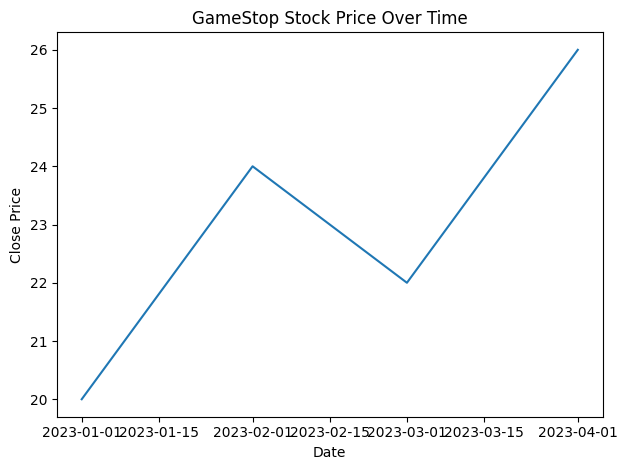

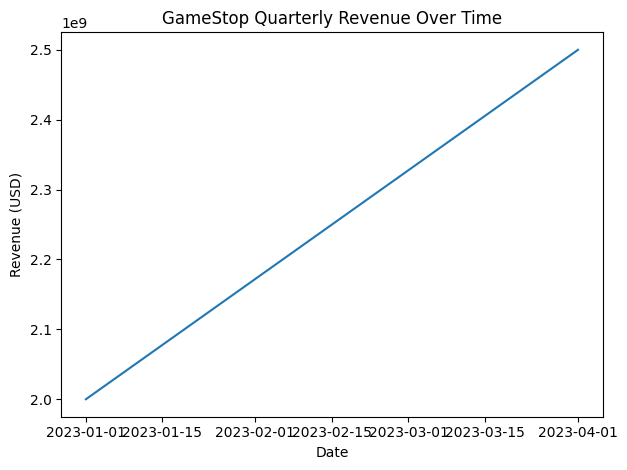

In [ ]:
def make_graph(price_df, revenue_df, ticker):
    price_df['Date'] = pd.to_datetime(price_df['Date'])
    revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])

    # Stock price chart
    fig1, ax1 = plt.subplots()
    ax1.plot(price_df['Date'], price_df['Close'])
    ax1.set_title(f'{ticker} Stock Price Over Time')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price')
    fig1.tight_layout()

    # Quarterly revenue chart
    fig2, ax2 = plt.subplots()
    ax2.plot(revenue_df['Date'], revenue_df['Revenue'])
    ax2.set_title(f'{ticker} Quarterly Revenue Over Time')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Revenue (USD)')
    fig2.tight_layout()

    return fig1, fig2

gme_data = pd.DataFrame({
    'Date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01'],
    'Close': [20, 24, 22, 26]
})

gme_revenue = pd.DataFrame({
    'Date': ['2023-01-01', '2023-04-01'],
    'Revenue': [2000000000, 2500000000]
})

make_graph(gme_data, gme_revenue, 'GameStop')

plt.show()